<a href="https://colab.research.google.com/github/shitalhabib512/DAV/blob/main/Feb_Mar_24_Z_Test_Contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest



#----------------------------------------   Part 1: "Two Sample T_Test"  --------------------------------------------

#Height Population Data

In [ ]:
#Load weight-height data

!gdown 12zss9SplRh1xr38o4WHOFJ0WRlpAJbrG

df = pd.read_csv("weight-height.csv")

print("\n\n")
df.head()

Downloading...
From: https://drive.google.com/uc?id=12zss9SplRh1xr38o4WHOFJ0WRlpAJbrG
To: /content/weight-height.csv
100% 180k/180k [00:00<00:00, 72.8MB/s]





,Gender,Height,Weight
0,Male,73.8,241.9
1,Male,68.8,162.3
2,Male,74.1,212.7
3,Male,71.7,220.0
4,Male,69.9,206.3


In [ ]:
#Assigning Random Hats to people in df

df['Hat_Colour'] = np.random.choice(["Red","Blue"],size=len(df))

df.head()

,Gender,Height,Weight,Hat_Colour
0,Male,73.8,241.9,Red
1,Male,68.8,162.3,Red
2,Male,74.1,212.7,Blue
3,Male,71.7,220.0,Blue
4,Male,69.9,206.3,Red


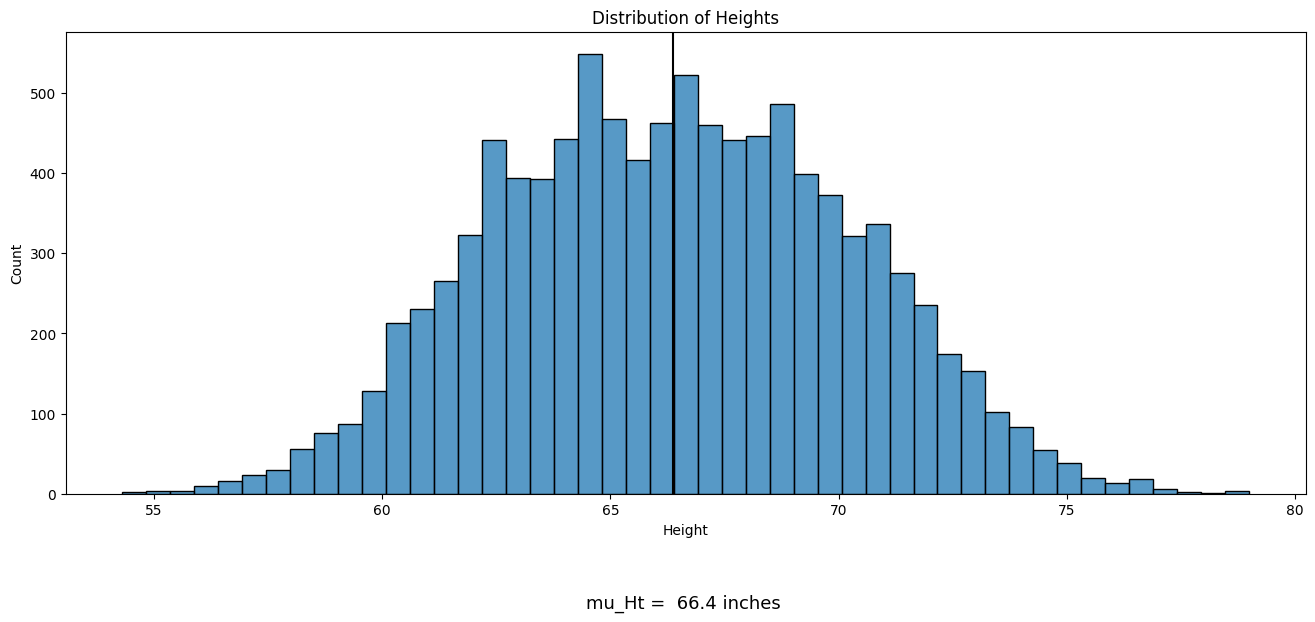

In [ ]:
#Plot the Distribution of Heights

plt.figure(figsize=(16,6))

mu_Ht = df['Height'].mean()

plt.title("Distribution of Heights")
sns.histplot(data=df, x='Height')
plt.axvline(mu_Ht, color="black")
plt.figtext(0.45, -0.08, f"mu_Ht = {mu_Ht : .1f} inches", color="black", fontsize=13)
plt.show()

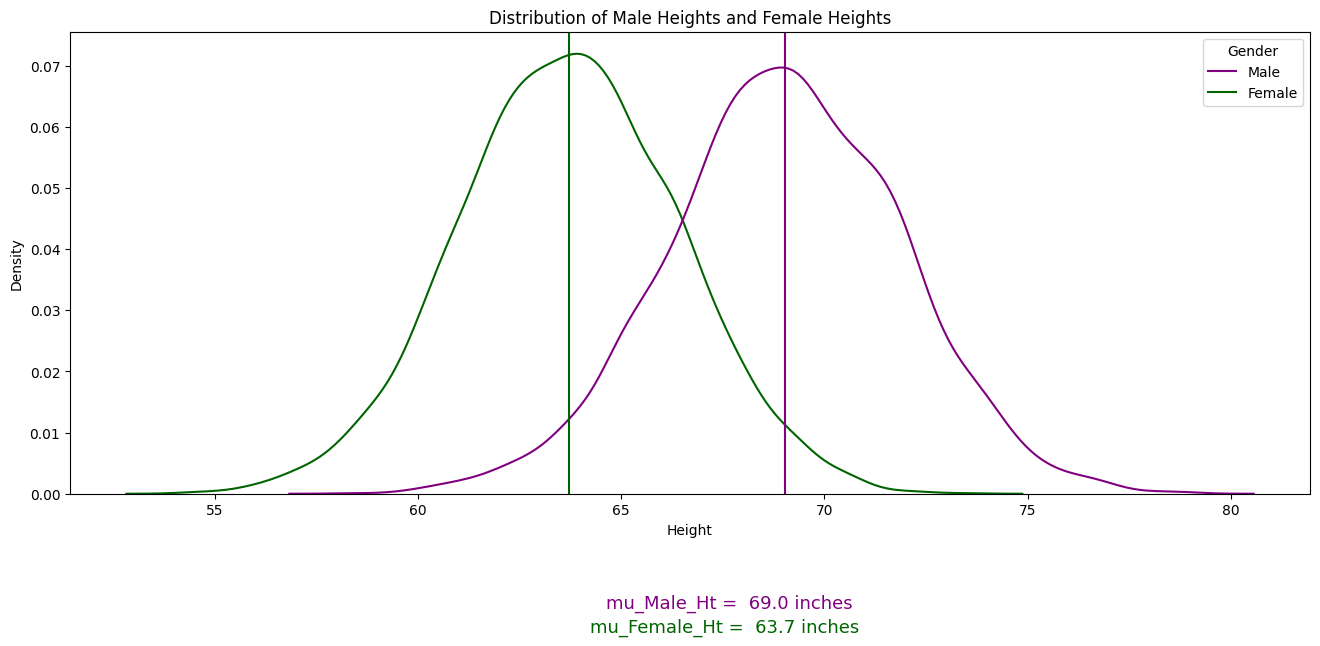

In [ ]:
#Plot the Distributions of Male Heights and Female Heights

plt.figure(figsize=(16,6))

male_height_mu = df[df["Gender"]=="Male"]["Height"].mean()
female_height_mu = df[df["Gender"]=="Female"]["Height"].mean()

plt.title("Distribution of Male Heights and Female Heights")

sns.kdeplot(data=df, x='Height', hue="Gender", palette={'Male':"purple", 'Female':"darkgreen"})

plt.axvline(male_height_mu, color="purple")
plt.axvline(female_height_mu, color="darkgreen")

plt.figtext(0.46, -0.08, f"mu_Male_Ht = {male_height_mu : .1f} inches", color="purple", fontsize=13)
plt.figtext(0.45, -0.12, f"mu_Female_Ht = {female_height_mu : .1f} inches", color="darkgreen", fontsize=13)

plt.show()

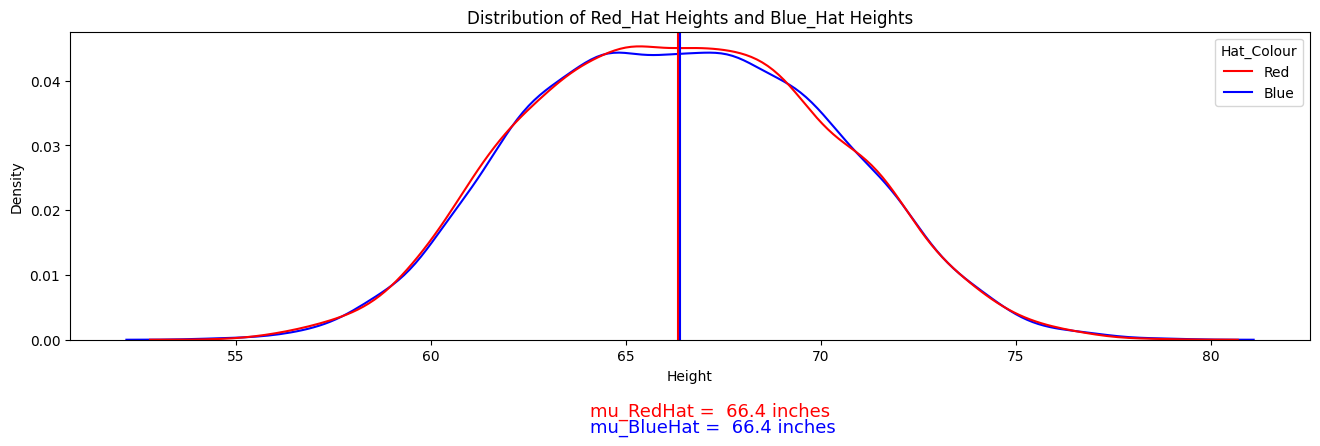

In [ ]:
#Plot the Distributions of Red_Hat Heights and Blue_Hat Heights

plt.figure(figsize=(16,4))

RedHat_height_mu = df[df["Hat_Colour"]=="Red"]["Height"].mean()
BlueHat_height_mu = df[df["Hat_Colour"]=="Blue"]["Height"].mean()

plt.title("Distribution of Red_Hat Heights and Blue_Hat Heights")

sns.kdeplot(data=df, x='Height', hue="Hat_Colour", palette={'Red':"red", 'Blue':"blue"})

plt.axvline(RedHat_height_mu, color="red")
plt.axvline(BlueHat_height_mu, color="blue")

plt.figtext(0.45, -0.08, f"mu_RedHat = {RedHat_height_mu : .1f} inches", color="red", fontsize=13)
plt.figtext(0.45, -0.12, f"mu_BlueHat = {BlueHat_height_mu : .1f} inches", color="blue", fontsize=13)

plt.show()

#Samples of Height measurements from the Population

In [ ]:
print(f"{'type of sample' : ^25} | {'sample mean' : ^15} | {'sample size' : ^15}")
print("-"*75)

#Sample of Male and Female Heights
sample_male = df[df["Gender"]=="Male"]["Height"].sample(10, random_state=12574)
sample_female = df[df["Gender"]=="Female"]["Height"].sample(13, random_state=33721)


print("\n\n")
print("-"*75)
print(f"{'sample_male_Ht' : ^25} | {sample_male.mean() : ^15.1f} | {len(sample_male) : ^15d}")
print("-"*75)
print(f"{'sample_female_Ht' : ^25} | {sample_female.mean() : ^15.1f} | {len(sample_female) : ^15d}")
print("-"*75)


#Sample of Red_Hat and Blue_Hat Heights
sample_RedHat = df[df["Hat_Colour"]=="Red"]["Height"].sample(11, random_state=85421)
sample_BlueHat = df[df["Hat_Colour"]=="Blue"]["Height"].sample(13, random_state=47409)

print("\n\n")
print("-"*75)
print(f"{'sample_RedHat_Ht' : ^25} | {sample_RedHat.mean() : ^15.1f} | {len(sample_RedHat) : ^15d}")
print("-"*75)
print(f"{'sample_BlueHat_Ht' : ^25} | {sample_BlueHat.mean() : ^15.1f} | {len(sample_BlueHat) : ^15d}")
print("-"*75)

     type of sample       |   sample mean   |   sample size  
---------------------------------------------------------------------------



---------------------------------------------------------------------------
     sample_male_Ht       |      68.7       |       10       
---------------------------------------------------------------------------
    sample_female_Ht      |      63.5       |       13       
---------------------------------------------------------------------------



---------------------------------------------------------------------------
    sample_RedHat_Ht      |      64.9       |       11       
---------------------------------------------------------------------------
    sample_BlueHat_Ht     |      66.0       |       13       
---------------------------------------------------------------------------


#Two-Sample T_Test in Python

In [ ]:
"""
  #T_test for two "Independent Samples"

  From scipy.stats, use the ttest_ind() function
  Ho: mu_1 = mu_2 (population means - from which samples are drawn - are similar)
  Ha:
      (a) mu_1 != mu_2 (if alternative = 'two-sided')
      (b) mu_1 < mu_2 (if alternative = 'less')
      (c) mu_1 > mu_2 (if alternative = 'greater')

  Inputs to the function:
    ttest_ind(a = sample_1, b = sample_2, alternative = 'less' / 'greater' / 'two-sided')

        Note:
          -> In the inputs, pass the full sample of data points as a list or array, not just the sample mean
          -> Default value of alternative = 'two-sided'

  Output of the function:
    A tuple containing (t_stat, p_value, degrees_of_freedom)
"""

from scipy import stats
#stats.ttest_ind(a = sample_1, b = sample_2, alternative = 'greater' / 'less' / 'two-sided')

In [ ]:
#Quiz 1


"""
Determine whether there is a statistically significant difference in
the average heights of plants grown with fertilizer X and fertilizer Y.

Group A (Fertilizer X):
Heights = [162, 164, 168, 170, 174, 176, 180, 182, 186, 188, 192, 194, 198, 200, 204, 206, 210, 212, 216, 218, 222, 224, 228, 230, 234, 236, 240, 242, 246, 248, 252, 254, 258, 260, 264, 266, 270]

Group B (Fertilizer Y):
Heights = [158, 162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 274, 278, 282, 286, 290, 294, 298, 302]


Significance Level (α): 0.1

"""

sample_group_A = [162, 164, 168, 170, 174, 176, 180, 182, 186, 188, 192, 194, 198, 200, 204, 206, 210, 212, 216, 218, 222, 224, 228, 230, 234, 236, 240, 242, 246, 248, 252, 254, 258, 260, 264, 266, 270]

sample_group_B = [158, 162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 274, 278, 282, 286, 290, 294, 298, 302]



#Ho: mu_A = mu_B
#Ha: muA != mu_B ('two-sided' test)

print(f"sample_group_A.mean = {np.mean(sample_group_A) : .1f}")
print(f"sample_group_B.mean = {np.mean(sample_group_B) : .1f}")

from scipy import stats
stats.ttest_ind(a = sample_group_A, b = sample_group_B, alternative = 'two-sided')


#Alternate Hypothesis / Alternative Hypothesis


sample_group_A.mean =  215.5
sample_group_B.mean =  230.0


TtestResult(statistic=-1.6280691715301856, pvalue=0.10787862863608348, df=72.0)

In [ ]:
"""
If alpha = 10%

p_value = 10.78%


In this case, p > alpha: Fail to Reject Ho
"""


#Break: Resuming at 8:19 AM IST

'\nIf alpha = 10%\n\np_value = 10.78%\n\n\nIn this case, p > alpha: Fail to Reject Ho \n'

#----------------------------------   Part 2: "Z proportion Test"  -----------------------------------------------------

#Cars in Poland data: Proporition of European Brand cars in Population

In [ ]:
#importing the Car_Prices_Poland dataset

!gdown 1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U

Car_Prices_Poland = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

print(f"\n\nSuccess! Data loaded into dataframe Car_Prices_Poland:\n\n {Car_Prices_Poland.head()}")

print(f"\n\nShape of Car_Prices_Poland dataframe = {Car_Prices_Poland.shape}")

Downloading...
From: https://drive.google.com/uc?id=1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U
To: /content/Car_Prices_Poland_Kaggle.csv
100% 9.89M/9.89M [00:00<00:00, 63.4MB/s]


Success! Data loaded into dataframe Car_Prices_Poland:

    Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  


Shape of Car_Prices_Poland dataframe 

In [ ]:
Car_Prices_Poland['mark'].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [ ]:
#Adding a Boolean column to mark European Brands

european_brands_list = ['opel', 'audi', 'bmw', 'volkswagen', 'mercedes-benz',
                        'renault', 'skoda', 'alfa-romeo', 'citroen',
                        'fiat', 'mini', 'peugeot', 'seat', 'volvo']

Car_Prices_Poland['European_Brand?'] = Car_Prices_Poland['mark'].isin(european_brands_list)


print(Car_Prices_Poland.head())

   Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  European_Brand?  
0            Janki  Mazowieckie  35900             True  
1         Katowice      Śląskie  78501             True  
2            Brzeg     Opolskie  27000             True  
3        Korfantów     Opolskie  30800             True  
4  Tarnowskie Góry      Śląskie  35900             True  


In [ ]:
#Display proportion of European Brands in Population

print(f"Total Cars in Population = {Car_Prices_Poland.shape[0] : ,}\n")
print(f"Total European Brand Cars in Population = {Car_Prices_Poland['European_Brand?'].sum() : ,}\n")
print(f"Proportion of European Branded Cars in Population = {Car_Prices_Poland['European_Brand?'].sum() / Car_Prices_Poland.shape[0] : .3f}\n")

Total Cars in Population =  117,927

Total European Brand Cars in Population =  85,543

Proportion of European Branded Cars in Population =  0.725



#Sampling cars to predict "proportion of European brand cars" population

In [ ]:
#Sample size (n)
n = 25

#Number of random samples to be picked (each of size 'n')
num_of_samples = 8

samples = np.random.choice(Car_Prices_Poland['European_Brand?'], size=(num_of_samples, n))
sample_proportions = samples.sum(axis=1)/n


print(f"Proportion of European Cars in each of the {num_of_samples} samples of sample size = {n}:\n\n")

print(f"{'Sample_index' : ^20} | {'Proportion_Euro_in_Sample' : ^30} | {f'First {min(10,n)}/{n} Boolean values for European_Brand? in sample' : ^65}")
print("-"*120)

for i, sample_i in enumerate(samples):
  print(f"{i : ^20d} | {sample_i.sum()/sample_i.size: ^30.3f} | {np.array(sample_i)[:10]}")
  print("-"*120)


Proportion of European Cars in each of the 8 samples of sample size = 25:


    Sample_index     |   Proportion_Euro_in_Sample    |     First 10/25 Boolean values for European_Brand? in sample     
------------------------------------------------------------------------------------------------------------------------
         0           |             0.640              | [ True  True False False False False  True  True False False]
------------------------------------------------------------------------------------------------------------------------
         1           |             0.680              | [False  True  True False  True False False  True False  True]
------------------------------------------------------------------------------------------------------------------------
         2           |             0.800              | [ True False  True  True  True False  True False  True  True]
-------------------------------------------------------------------------------------

CLT: Plotting Sample_Proportions of many, many such samples

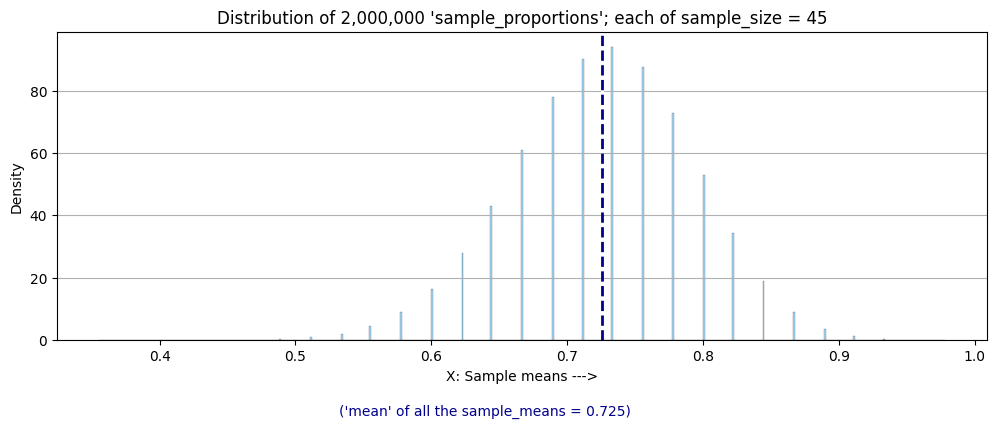

In [ ]:
#Sample size (n)
n = 45

#Number of random samples to be picked (each of size 'n')
num_of_samples = 2000000

samples = np.random.choice(Car_Prices_Poland['European_Brand?'], size=(num_of_samples, n))
sample_proportions = samples.sum(axis=1) / n



plt.figure(figsize=(12,4))
plt.title(f"Distribution of {num_of_samples:,} 'sample_proportions'; each of sample_size = {n}")
sns.histplot(x=sample_proportions, stat='density', color="lightskyblue") #stat= 'count' / 'density' / 'kde'
plt.grid(axis='y')
plt.axvline(sample_proportions.mean(), color="darkblue", linewidth=2, linestyle='dashed', gapcolor="white")
plt.xlabel("X: Sample means --->")
plt.figtext(0.36, -0.08,f"('mean' of all the sample_means = {sample_proportions.mean():.3f})", color='darkblue')
plt.show()


#Solving Questions on Z Proportion test

In [ ]:
"""

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count = , nobs = , value= , alternative=’two-sided’)

where the inputs to be given are:
    (a) count: The number of successes in sample
    (b) nobs: Total number of observation in sample
    (c) value: The hypothesized population proportion (on a scale of 0 to 1)
    (d) alternative: The alternative hypothesis (‘smaller’, ‘larger’, default =‘two-sided’)


Output of the function:
A tuple containing (z_stat, p_value)

"""

from statsmodels.stats.proportion import proportions_ztest
#proportions_ztest(count = , nobs = , value= , alternative= 'smaller' / 'larger' /'two-sided')

In [ ]:
#Question 1

"""
A fast-food restaurant claims that 80% of their customers prefer their new burger over the old one.
In a random sample of 100 customers, 85 said they preferred the new burger.
What is the null and alternative hypothesis?
"""


#Ho: pop_proportion = 0.80
#Ha: pop_proportion != 0.80 ('two-sided')
pop_proportion = 0.80

#Sample:
n = 100
no_of_successes = 85

proportions_ztest(count = 85 , nobs = 100, value= 0.8, alternative= 'two-sided')


#In the output: The first value is a z_score, and the second value is a P-value

#If alpha = 5%

#THEN p (16.14%) > alpha -> Fail to Reject Ho

(1.4002800840280079, 0.16142946236708378)

In [ ]:
#Question 2

"""
A researcher is studying the satisfaction level of customers
after implementing a new customer service system.

They collected survey responses from 250 customers
and found that 65 of them were dissatisfied with the new system.


The researcher wants to test the null hypothesis that
no more than 30% of customers are dissatisfied with the new system.

Use the p-value technique to test the claim with a significance level of α = 0.05.
"""


#Ho: pop_proportion <= 0.30
#Ha: pop_proportion > 0.30 (RIGHT TAILED test: alternative= 'larger')

#sample
nobs = 250
count_successes = 65 #not_satisfied


from statsmodels.stats.proportion import proportions_ztest
z_score, p_val = proportions_ztest(count = 65 , nobs = 250, value= 0.30, alternative = 'larger')


print(f"p_value = {p_val}")

#Fail to REJECT Ho

p_value = 0.925331109714639


Two Sample Z Proportion Test

In [ ]:
#NOTE on two sample z_proportion test

"""
You can use the SAME function proportions_ztest to "Z Proportion Test" for two samples

In this case:
Ho: proportion_population_A (p_A) = proportion_population_B (p_B)
Ha:
  (a) p_A != p_B (alternative = 'two-sided')
  (b) p_A < p_B (alternative = 'smaller')
  (c) p_A > p_B (alternative = 'two-sided')


#import the function from the library
from statsmodels.stats.proportion import proportions_ztest

If sample_A and sample_B are lists/arrays of your two samples,
then pass the two samples directly as follows...

proportions_ztest(sample_A, sample_B, alternative= 'smaller' / 'larger' /'two-sided')


Outputs of the function:
A tuple containing (z_stat, p_value)

"""
pass